##### Öncelikle 

In [29]:
from config.config import BOOK_API_KEY
from googleapiclient.discovery import build

import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def anahtar_kelimeye_göre_ara(books_service, keywords):
    request = books_service.volumes().list(
        q=",".join(keywords)
    )
    response = request.execute()
    return response.get("items", [])

In [45]:
api_service_name = "books"
api_version = "v1"

book_keyword = ["Data Science"]

books = build(api_service_name, api_version, developerKey=BOOK_API_KEY)

# Anahtar kelimelere göre kitapları getir
eslesen_kitaplar = anahtar_kelimeye_göre_ara(books, book_keyword)

# Verileri bir DataFrame'e dönüştür
books_info_df = pd.DataFrame([
    {
        "Title": book["volumeInfo"]["title"],
        "Authors": book["volumeInfo"].get("authors", ["N/A"]),
        "Description": book["volumeInfo"].get("description", "N/A"),
        "PublishedDate": book["volumeInfo"].get("publishedDate", "N/A"),
        "Categories": book["volumeInfo"].get("categories", "N/A")
    }
    for book in eslesen_kitaplar
])

# DataFrame'i ekrana yazdır
print(books_info_df)

                                               Title  \
0                       Harry Potter ve Sirlar Odasi   
1                       Harry Potter ve Felsefe Taşı   
2                    Harry Potter ve Azkaban Tutsağı   
3  Harry Potter ve Lanetli Çocuk Birinci ve İkinc...   
4             Harry Potter ve Zümrüdüanka Yoldaşlığı   
5                              Çağlar Boyu Quidditch   
6                          Ozan Beedle’ın Hikâyeleri   
7                        Harry Potter ve Melez Prens   
8                   Harry Potter ve ölüm yadigârları   
9              Harry Potter: Komple Koleksiyon (1-7)   

                                     Authors  \
0                             [J.K. Rowling]   
1                             [J.K. Rowling]   
2                             [J.K. Rowling]   
3  [J.K. Rowling, Jack Thorne, John Tiffany]   
4                             [J.K. Rowling]   
5         [J.K. Rowling, Kennilworthy Whisp]   
6                             [J.K. Rowling]   

In [32]:
def en_uretken_yil(books_info_df):
    # 'publishedDate' sütunu tarih nesnelerine dönüştürülür
    books_info_df['PublishedDate'] = pd.to_datetime(books_info_df['PublishedDate'], errors='coerce')
    # errors='coerce' parametresi, dönüştürme sırasında hatalar oluşursa hata yerine NaN (Not a Number) değerini ekler
    
    # 'publishedDate' sütunundan yıl bilgisi çıkartılarak 'publishedYear' adında yeni bir sütuna eklenir
    books_info_df['PublishedYear'] = books_info_df['PublishedDate'].dt.year
    
    # En çok tekrar eden yıl bulunur ve ilk olan alınır
    en_uretken_yil = books_info_df['PublishedYear'].mode()[0]
    
    return en_uretken_yil


In [33]:
def plot_yillik_kitaplar(books_info_df):
    # 'PublishedDate' sütunundaki tarih verilerini alır ve bu tarihleri yıl cinsine dönüştürür.
    # Eğer bir hata oluşursa (örneğin, tarih formatı hatalıysa), 'errors='coerce'' parametresi sayesinde NaN (Not a Number) değeri atanır.
    books_info_df['PublishedYear'] = pd.to_datetime(books_info_df['PublishedDate'], errors='coerce').dt.year
    
    # Oluşturulan 'PublishedYear' sütununu kullanarak her yıl kaç kitap yayınlandığını hesaplar.
    # Bu sayıları, yıl sıralamasına göre gruplar ve her yılın kitap sayısını içeren bir Seri oluşturur.
    yillik_kitaplar = books_info_df['PublishedYear'].value_counts().sort_index()
    
    # Çubuk grafik üzerinde yıllara göre kitap sayısını gösterir.
    # 'kind='bar'' parametresi, çubuk grafik tipini belirtir.
    # 'xlabel', 'ylabel' ve 'title' parametreleri, grafiğin ekseni ve başlığını belirlemek içindir.
    yillik_kitaplar.plot(kind='bar', xlabel='Yıl', ylabel='Kitap Sayısı', title='Yıllara Göre Kitap Sayısı')
    
    # Grafiği gösterir.
    plt.show()


In [34]:
# En üretken yılı bul ve ekrana yazdır
en_uretken_yil = en_uretken_yil(books_info_df)
print(f"En üretken yıl: {en_uretken_yil}")

En üretken yıl: 2018


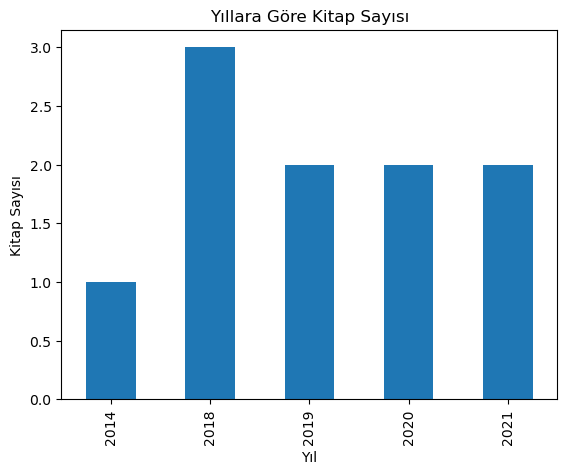

In [35]:
# Kitap sayısını yıl bazında çizdir
plot_yillik_kitaplar(books_info_df)

In [36]:
def plot_tur_dagilimi(books_info_df):
    tur_dagilimi = books_info_df['Categories'].value_counts()
    
    # Dağılım grafiği çizimi
    tur_dagilimi.plot(kind='bar', xlabel='Kitap Türü', ylabel='Kitap Sayısı', title='Kitap Türlerine Göre Dağılım')
    plt.show()


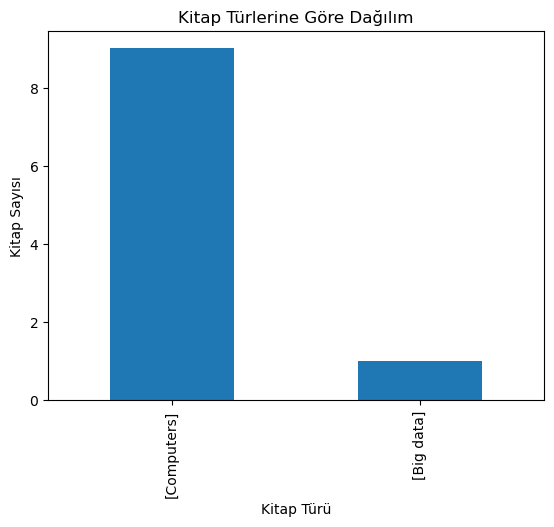

In [37]:
plot_tur_dagilimi(books_info_df)

In [48]:
def plot_yazar_basina_kitap(books_info_df):
    yazar_basina_kitap = books_info_df['Authors'].explode().value_counts()
    yazar_basina_kitap.plot(kind='bar', xlabel='Yazar', ylabel='Kitap Sayısı', title='Yazar Bazında Kitap Sayısı')
    plt.show()


##### Buradaki fonksiyonun işlevselliğini görebilmek adına yukarıda kullanılan book_keyword = ["Harry Potter"] şeklinde değiştirilmiştir.

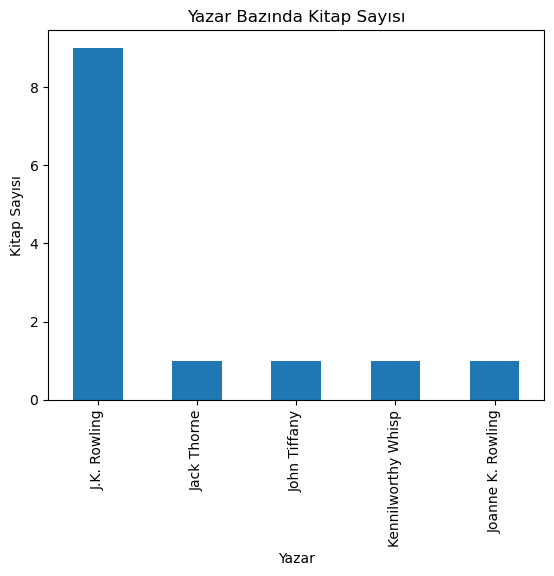

In [49]:
plot_yazar_basina_kitap(books_info_df)